# Codelab for Convolutional Neural Net

All rights reserved.<br \>
This material cannot be published, rewritten or redistributed in whole or part without the authors' written permission.

**Convolutional Neural Net** will be abbreviated to **ConvNet** in the following sections.

### Index
1. [Pre-processing](#Pre-processing)
2. [Recipes for ConvNet](#Recipes-Exclusively-for-Convolutional-Neural-Nets)
    1. [Network Structure](#Network-Structure)
        1. [Activity 1](#Tutorial/workshop-activity-1)
    2. [Pooling](#Pooling)
        1. [Activity 2](#Tutorial/workshop-activity-2)
3. [Define Training Procedure](#Define-Training-Procedure)     
4. [Start Training](#Start-Training) and [Observe Training Process](#Observe-Training-Process)
5. [Testing](#Define-Testing-Procedure)

During tutorial/workshop, attendees will be separated into three groups. Each group will be conducting different activities.<br />

Activity: "Cell" $\rightarrow$ "Run All Below" for testing the enviroment.


In [1]:
################################################################
#
# All rights reserved.
#
# This is a codelab for Convolutional Neural Net.
# Details include:
#   - Pre-process dataset
#   - Elaborate recipes
#   - Define training procedures
#   - Train and test models
#   - Observe metrics
#
################################################################
from __future__ import print_function

import keras.callbacks as cb
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2
from keras.utils import np_utils

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import time

Using TensorFlow backend.


## Pre-processing

Pre-processing for ConvNet is slightly different than that of FNNs. Here, you need to transform the data into a 3-D tensor with dimensions [width] $\times$ [height] $\times$  [channel].

Width and height are from a image.
Each channel represents a color.

Common techniques for data augmentation:
1. Cropping
2. Random cropping
3. Rotation
4. Add random noises


In [2]:
def PreprocessDataset():
    # Load dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Set numeric type
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalize value to [0, 1]
    x_train /= 255
    x_test /= 255
    # Transform lables to one-hot
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    # Reshape: here x_train is re-shaped to [channel] × [width] × [height]
    # In other environment, the orders could be different; e.g., [height] × [width] × [channel].
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    return [x_train, x_test, y_train, y_test]

x_train, x_test, y_train, y_test = PreprocessDataset()

MemoryError: 

## Recipes Exclusively for Convolutional Neural Nets

### Convolutional Layer
Network structure refers to components of a convnet.

Ingredients:
1. **Filters**: define the size of a filter, and the total number of filters in a convolutional layer.
2. **Depth** represents the number of layers, usually 10-30.
3. **Stride** defines the step at which the filter moves.
4. **Padding** of the input data, either no padding or zero-padding.

How to calculate the number of parameters

Functionalityies of convolutional layers: 
- Capture patterns
- Share parameters (otherwise too many parameters)

### Pooling
Pooling layer reduces the output of the previous layer.

max-k pool (usually k = 1)


In [3]:
num_filters = 16
filter_size = 3

def DefineModel():
    model = Sequential()
    # First conv layer with filters of 3x3 pixels; also need to specify input shape.
    # The number of filters is set to 16 for shorter runtime.
    # Increase the number of filters for better accuracy.
    # Strides are defined as in subsample=(1, 1)
    model.add(Conv2D(num_filters, (filter_size, filter_size), input_shape=(28, 28, 1), padding="valid"))
    # The activation for first layer is ReLU
    model.add(Activation('relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # The last layer has the same dimension as the number of classes
    model.add(Flatten())
    model.add(Dense(10))
    # For classification, the activation is softmax
    model.add(Activation('softmax'))
    # Define optimizer
    optmzr = SGD(lr=0.1, clipnorm=5.)
    # Define loss function = cross entropy
    model.compile(loss='categorical_crossentropy', optimizer=optmzr, metrics=["accuracy"])

    return model

## Define Training Procedure

In [4]:
def TrainModel(data=None, epochs=20, batch=256):
    start_time = time.time()
    model = DefineModel()
    if data is None:
        print("Must provide data.")
        return
    x_train, x_test, y_train, y_test = data
    print('Start training.')
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
              validation_data=(x_test, y_test), verbose=1)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

## Start Training

In [5]:
trained_model, training_history = TrainModel(data=[x_train, x_test, y_train, y_test])

Start training.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s - loss: 0.5643 - acc: 0.8356 - val_loss: 0.3585 - val_acc: 0.8933
Epoch 2/20
60000/60000 [==============================] - 13s - loss: 0.3144 - acc: 0.9080 - val_loss: 0.2707 - val_acc: 0.9229
Epoch 3/20
60000/60000 [==============================] - 14s - loss: 0.2669 - acc: 0.9233 - val_loss: 0.2589 - val_acc: 0.9258
Epoch 4/20
60000/60000 [==============================] - 13s - loss: 0.2226 - acc: 0.9358 - val_loss: 0.1929 - val_acc: 0.9454
Epoch 5/20
60000/60000 [==============================] - 14s - loss: 0.1868 - acc: 0.9478 - val_loss: 0.1628 - val_acc: 0.9531
Epoch 6/20
60000/60000 [==============================] - 14s - loss: 0.1597 - acc: 0.9560 - val_loss: 0.1424 - val_acc: 0.9589
Epoch 7/20
60000/60000 [==============================] - 14s - loss: 0.1399 - acc: 0.9613 - val_loss: 0.1202 - val_acc: 0.9650
Epoch 8/20
60000/60000 [==============

## Observe Training Process
Plot the variation of loss during each batch

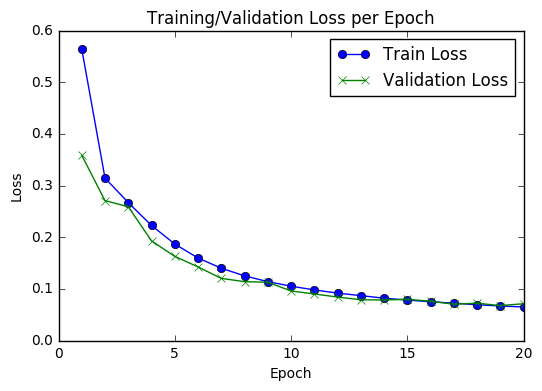

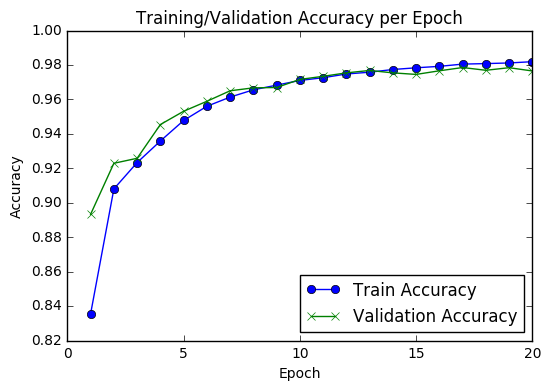

In [6]:
def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value, 'o-')
    ax.plot([None] + test_value, 'x-')
    # Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train ' + value_is_loss_or_acc, 'Validation ' + value_is_loss_or_acc], loc = 0) 
    ax.set_title('Training/Validation ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotHistory(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')

## Testing

In [7]:
def TestModel(model=None, data=None):
    if model is None:
        print("Must provide a trained model.")
        return
    if data is None:
        print("Must provide data.")
        return
    x_test, y_test = data
    scores = model.evaluate(x_test, y_test)
    return scores

## Test the trained model

In [8]:
test_score = TestModel(model=trained_model, data=[x_test, y_test])
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

 9600/10000 [===========================>..] - ETA: 0sTest loss 0.0712, accuracy 97.65%


## Visualize Convolutional Layers

In [9]:
def ShowConvolutionOutput(input_data, show_pic_idx):
    from keras import backend as K
    first_conv = K.function(trained_model.inputs, [trained_model.layers[1].output])
    first_conv_out = first_conv([input_data])
    fig, axes = plt.subplots(num_filters // 4, 4, figsize=(8, 8))
    for filter_num in range(num_filters):
        fig_x, fig_y = divmod(filter_num, 4)
        if fig_y == 0: fig_x -= 1
        axes[fig_x][fig_y].imshow(first_conv_out[0][show_pic_idx][filter_num])
        plt.setp(axes[fig_x][fig_y].get_xticklabels(), visible=False)
        plt.setp(axes[fig_x][fig_y].get_yticklabels(), visible=False)
    fig.tight_layout(pad=0)
    plt.show()

def ShowInputImage(data):
    plot = plt.figure()
    plot.set_size_inches(2,2)
    plt.imshow(np.reshape(-data, (28,28)), cmap='Greys_r')
    plt.title("Input")
    plt.axis('off')
    plt.show()

def ShowFinalOutput(input_data, samp):
    """Calculate final prediction."""
    from keras import backend as K
    # Calculate final prediction.
    last_layer = K.function(trained_model.inputs, [trained_model.layers[-1].output])
    last_layer_out = last_layer([input_data])
    print("Final prediction: " + str(np.argmax(last_layer_out[0][samp])) )


## Show Random Test Data

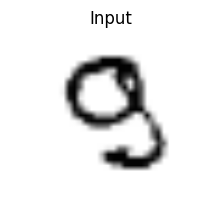

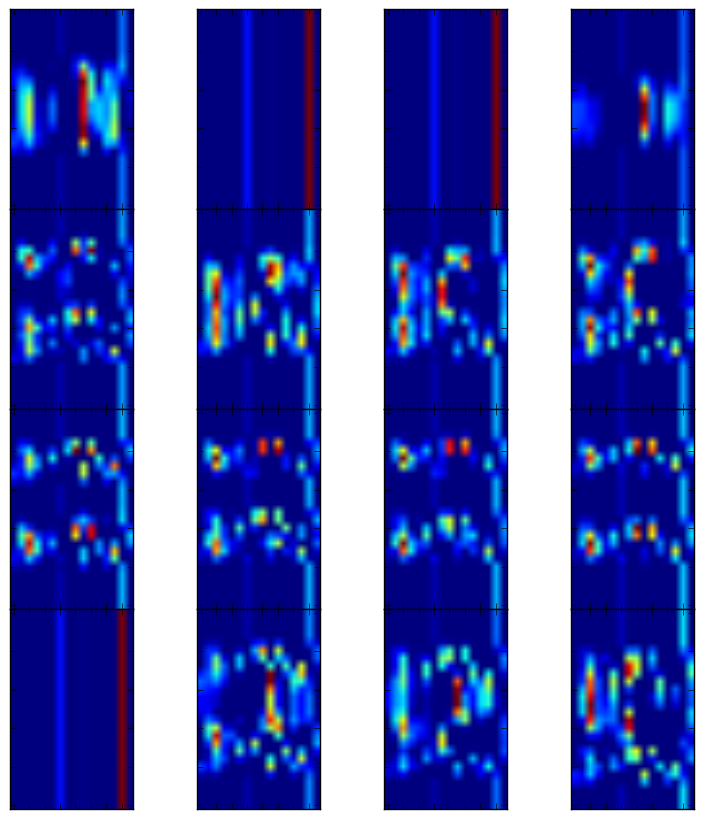

Final prediction: 9


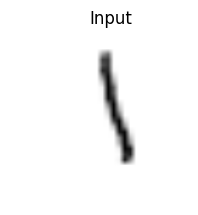

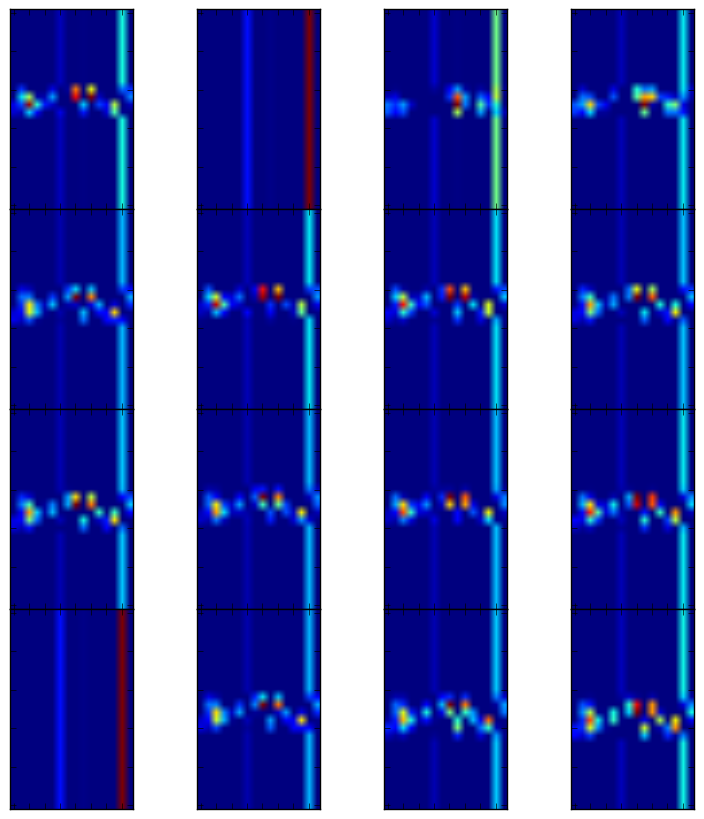

Final prediction: 1


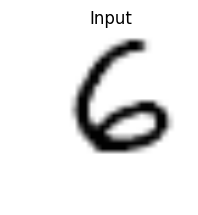

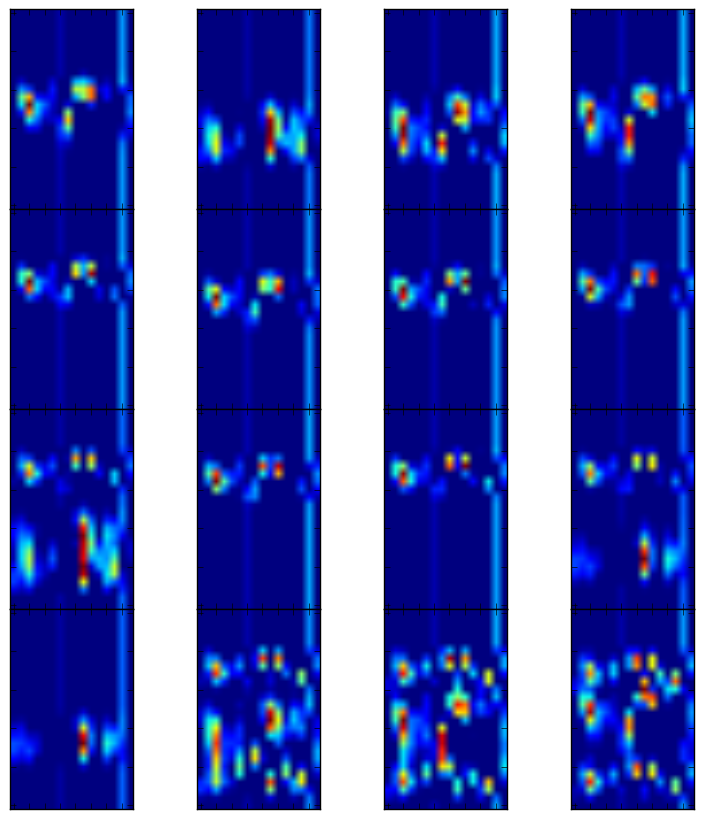

Final prediction: 6


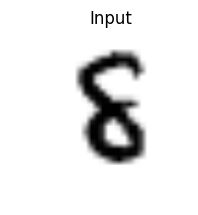

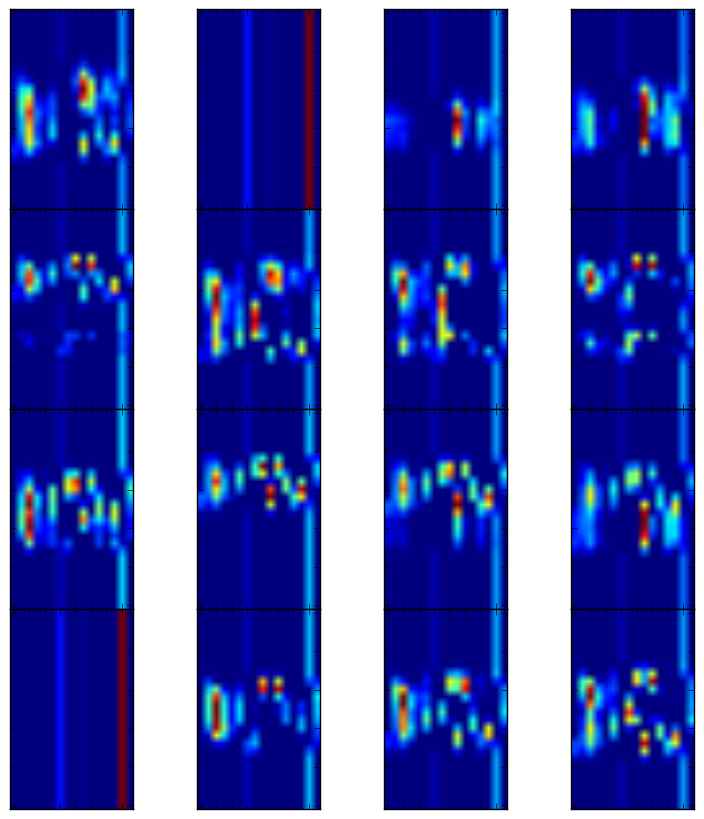

Final prediction: 8


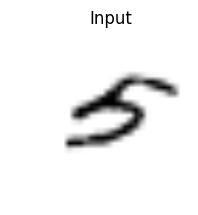

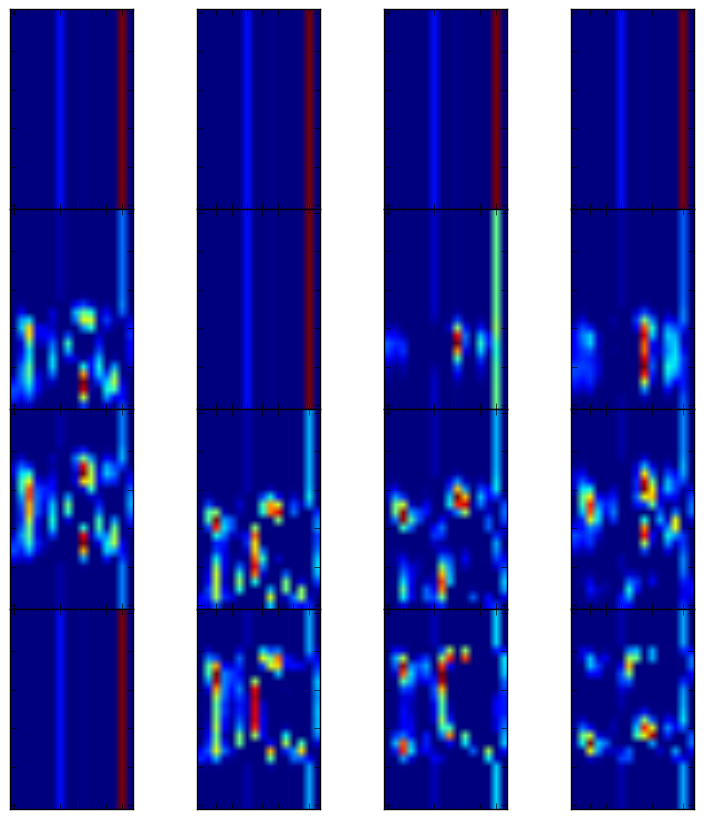

Final prediction: 5


In [10]:
np.random.seed(1337)
show_which_ones = np.random.randint(0, 999, 5)
for samp in show_which_ones:
    ShowInputImage(x_test[samp])
    ShowConvolutionOutput(x_test, samp)
    ShowFinalOutput(x_test, samp)